In [44]:
# univariate lstm examp
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import numpy as np
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras import (
    models,
    layers,
)
from pca import pca


In [16]:
music_data = np.load('../Data/music_data.npy')
other_data = np.load('../Data/other_data.npy')


num_samples = music_data.shape[0]
time_frames = music_data.shape[2]

X = np.concatenate((music_data, other_data), axis=0)
y = np.array([1]*num_samples + [0]*num_samples)

In [17]:
X.shape

(21000, 30, 79)

In [18]:
X10 = X[..., :10]

In [50]:
X10.shape

(21000, 30, 10)

In [51]:
X1 = X10.reshape(21000,300)

In [52]:
X1.shape

(21000, 300)

In [53]:
model = pca()

In [55]:
out = model.fit_transform(X1)

[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [300] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [37] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [300] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[37]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


In [56]:
print(out['topfeat'])

       PC feature   loading  type
0     PC1     177 -0.065238  best
1     PC2     295  0.094239  best
2     PC3      59  0.092568  best
3     PC4     165  0.128075  best
4     PC5       6 -0.118205  best
..    ...     ...       ...   ...
300  PC12     291  0.133657  weak
301  PC12     292  0.148029  weak
302  PC12     297  0.163161  weak
303  PC12     298  0.142759  weak
304  PC12     299  0.144589  weak

[305 rows x 4 columns]


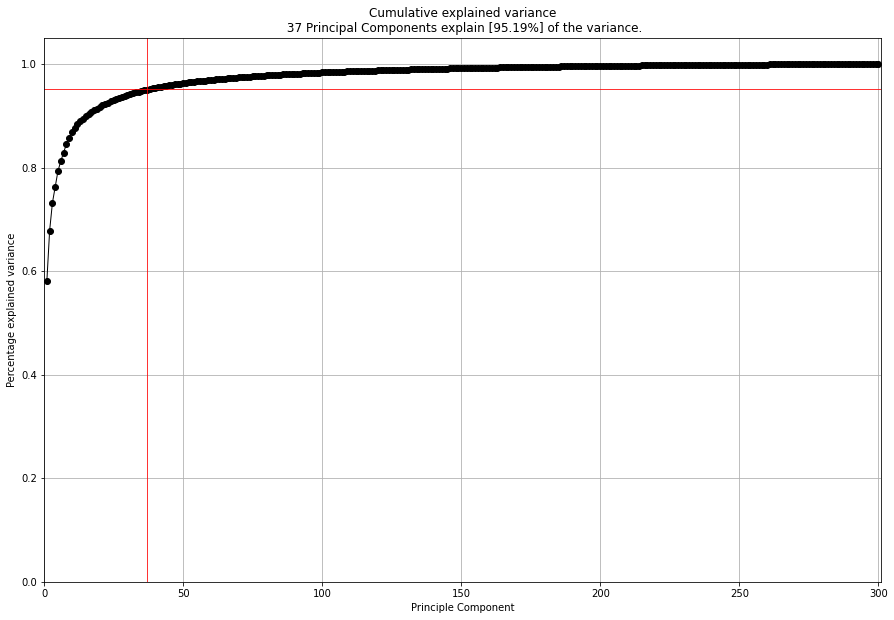

(<Figure size 1080x720 with 1 Axes>,
 <AxesSubplot:title={'center':'Cumulative explained variance\n 37 Principal Components explain [95.19%] of the variance.'}, xlabel='Principle Component', ylabel='Percentage explained variance'>)

<Figure size 432x288 with 0 Axes>

In [57]:
model.plot()

In [67]:
out['loadings']

,1,2,3,4,5,6,7,8,9,10,...,291,292,293,294,295,296,297,298,299,300
PC1,-0.039285,-0.040975,-0.041974,-0.042436,-0.042701,-0.042810,-0.042559,-0.042283,-0.041273,-0.040207,...,-0.050805,-0.051276,-0.051504,-0.051781,-0.051579,-0.051654,-0.051832,-0.051580,-0.050675,-0.049603
PC2,-0.029063,-0.028329,-0.031112,-0.033426,-0.035118,-0.035760,-0.034878,-0.032729,-0.028624,-0.023830,...,0.080193,0.089274,0.092223,0.094095,0.094239,0.093992,0.092897,0.092391,0.090854,0.087425
PC3,-0.054463,-0.054731,-0.055478,-0.042177,-0.021454,0.003902,0.028258,0.045435,0.053163,0.048619,...,-0.047570,-0.049535,-0.042738,-0.026968,-0.008423,0.012545,0.027220,0.033865,0.032887,0.024314
PC4,-0.122888,-0.125887,-0.114420,-0.093595,-0.080150,-0.076021,-0.083160,-0.100720,-0.116893,-0.123315,...,-0.077987,-0.076699,-0.061959,-0.047139,-0.045261,-0.055759,-0.075169,-0.092476,-0.101762,-0.097607
PC5,-0.011606,-0.026748,-0.049140,-0.083634,-0.108139,-0.118205,-0.106217,-0.074320,-0.038971,-0.019220,...,-0.008313,-0.026298,-0.055280,-0.087829,-0.103594,-0.096825,-0.070292,-0.039666,-0.018456,-0.016421
PC6,-0.080354,-0.073929,-0.066926,-0.052684,-0.033333,-0.016555,-0.000163,0.021875,0.041961,0.049247,...,0.104243,0.133634,0.135092,0.098563,0.034897,-0.034184,-0.075398,-0.083526,-0.070076,-0.046507
PC7,0.090902,0.073837,0.030367,-0.004133,0.003579,0.049149,0.090014,0.100744,0.075404,0.037475,...,0.051502,0.024373,-0.022894,-0.039352,-0.013776,0.018867,0.014094,-0.034197,-0.096466,-0.119257
PC8,-0.086522,-0.124555,-0.156998,-0.179498,-0.181605,-0.164465,-0.150692,-0.147764,-0.155762,-0.158185,...,0.041489,0.024982,0.009688,0.016418,0.048229,0.080411,0.083905,0.055830,0.019618,-0.000015
PC9,-0.032623,-0.080348,-0.102826,-0.127058,-0.149089,-0.166563,-0.165866,-0.137087,-0.096154,-0.061544,...,-0.097722,-0.079379,-0.006357,0.066776,0.097218,0.070134,0.009881,-0.048919,-0.078689,-0.080410
PC10,-0.177062,-0.195015,-0.173932,-0.154145,-0.143885,-0.137292,-0.136850,-0.147163,-0.171063,-0.192491,...,0.074668,0.075371,0.032252,-0.029083,-0.065163,-0.051867,0.001746,0.055246,0.076988,0.068930


In [72]:
model.results

{'loadings':              1         2         3         4         5         6         7  \
 PC1  -0.039285 -0.040975 -0.041974 -0.042436 -0.042701 -0.042810 -0.042559   
 PC2  -0.029063 -0.028329 -0.031112 -0.033426 -0.035118 -0.035760 -0.034878   
 PC3  -0.054463 -0.054731 -0.055478 -0.042177 -0.021454  0.003902  0.028258   
 PC4  -0.122888 -0.125887 -0.114420 -0.093595 -0.080150 -0.076021 -0.083160   
 PC5  -0.011606 -0.026748 -0.049140 -0.083634 -0.108139 -0.118205 -0.106217   
 PC6  -0.080354 -0.073929 -0.066926 -0.052684 -0.033333 -0.016555 -0.000163   
 PC7   0.090902  0.073837  0.030367 -0.004133  0.003579  0.049149  0.090014   
 PC8  -0.086522 -0.124555 -0.156998 -0.179498 -0.181605 -0.164465 -0.150692   
 PC9  -0.032623 -0.080348 -0.102826 -0.127058 -0.149089 -0.166563 -0.165866   
 PC10 -0.177062 -0.195015 -0.173932 -0.154145 -0.143885 -0.137292 -0.136850   
 PC11  0.031314 -0.006098 -0.058629 -0.050484  0.008108  0.039452  0.010273   
 PC12 -0.008675 -0.022582 -0.030020 -0.0

In [87]:
X_PCA = out['PC']

In [93]:
XPCA10[0].shape

(10, 79)

In [92]:
X_PCA.shape

(21000, 37)

In [98]:
ann = models.Sequential()
ann.add(layers.Conv1D(32, (1), activation='relu', input_shape=(37, 1)))
ann.add(layers.MaxPooling1D((1)))
ann.add(layers.Dropout(0.2))
ann.add(layers.Conv1D(32, (1), activation='relu', input_shape=(37, 1)))
ann.add(layers.MaxPooling1D((1)))
ann.add(layers.Dropout(0.2))
ann.add(layers.Flatten())
ann.add(layers.Dense(64, activation='relu'))
ann.add(layers.Dropout(0.2))
ann.add(layers.Dense(32, activation='relu'))
ann.add(layers.Dense(1, activation='sigmoid'))

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [99]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_PCA, y, test_size=0.2, stratify=y, random_state=124)
# X_train = X_train.reshape(X_train.shape[0]*X_train.shape[2], X_train.shape[1])
X_train, X_val, y_train, y_val = model_selection.train_test_split(X_train, y_train, test_size=0.2, random_state=124)

history = ann.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), callbacks=[callback])

Epoch 1/20
420/420 [==============================] - 2s 3ms/step - loss: 0.4630 - accuracy: 0.7921 - val_loss: 0.2572 - val_accuracy: 0.8908
Epoch 2/20
420/420 [==============================] - 1s 3ms/step - loss: 0.3076 - accuracy: 0.8715 - val_loss: 0.1982 - val_accuracy: 0.9226
Epoch 3/20
420/420 [==============================] - 1s 3ms/step - loss: 0.2631 - accuracy: 0.8947 - val_loss: 0.1810 - val_accuracy: 0.9283
Epoch 4/20
420/420 [==============================] - 1s 3ms/step - loss: 0.2307 - accuracy: 0.9084 - val_loss: 0.1670 - val_accuracy: 0.9330
Epoch 5/20
420/420 [==============================] - 1s 3ms/step - loss: 0.2164 - accuracy: 0.9144 - val_loss: 0.1599 - val_accuracy: 0.9363
Epoch 6/20
420/420 [==============================] - 1s 3ms/step - loss: 0.2008 - accuracy: 0.9177 - val_loss: 0.1638 - val_accuracy: 0.9318
Epoch 7/20
420/420 [==============================] - 1s 3ms/step - loss: 0.1886 - accuracy: 0.9246 - val_loss: 0.1459 - val_accuracy: 0.9432
Epoch 

In [100]:
y_pred = ann.predict(X_test) > 0.5

In [101]:
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

Precision: 0.943
Recall: 0.956
Accuracy: 0.949
F1 Score: 0.949
